In [46]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')


In [2]:
df1 = pd.read_csv("traindataset.csv")
df2 = pd.read_csv('testdataset.csv')

In [3]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8849-GYOKR,Female,0,Yes,No,54,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),106.55,5763.3,Yes
1,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
2,0909-SELIE,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),80.80,4860.85,No
3,3938-YFPXD,Male,0,No,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.1,No
4,2027-OAQQC,Female,0,No,No,43,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49.05,2076.2,Yes


In [4]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3108-PCCGG,Male,1,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),84.45,5899.85
1,7814-LEEVE,Female,0,Yes,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.30,20.3
2,3677-IYRBF,Female,1,No,No,2,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,30.40,78.65
3,9257-AZMTZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1078.75
4,7299-GNVPL,Female,0,Yes,Yes,23,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,84.40,1936.85


In [5]:
print(df1.shape)
print(df2.shape)

(4000, 21)
(3043, 20)


In [6]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df1[col]=df1[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df1)

df1['SeniorCitizen']=df1['SeniorCitizen'].astype(bool)
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')

In [7]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
    for col in columnsNames:
        df2[col]=df2[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df2)

df2['SeniorCitizen']=df2['SeniorCitizen'].astype(bool)
df2['TotalCharges']=pd.to_numeric(df2['TotalCharges'],errors='coerce')

In [8]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
print("Payment methods: ",df1.PaymentMethod.unique())
print("Contract types: ",df1.Contract.unique())
print("Gender: ",df1.gender.unique())
print("Senior Citizen: ",df1.SeniorCitizen.unique())
print("Internet Service Types: ",df1.InternetService.unique())

Payment methods:  ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
Contract types:  ['One year' 'Month-to-month' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['Fiber optic' 'DSL' 'No']


In [10]:
df1['gender']=df1['gender'].astype('category')
df1['PaymentMethod']=df1['PaymentMethod'].astype('category')
df1['Contract']=df1['Contract'].astype('category')
df1['SeniorCitizen']=df1['SeniorCitizen'].astype('category')
df1['InternetService']=df1['InternetService'].astype('category')
df1.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [11]:
dfPaymentDummies = pd.get_dummies(df1['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df1['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df1['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df1['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df1['InternetService'], prefix = 'IS')

print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_Bank transfer (automatic)  payment_Credit card (automatic)  \
0                                  1                                0   
1                                  1                                0   
2                                  1                                0   

   payment_Electronic check  payment_Mailed check  
0                         0                     0  
1                         0                     0  
2                         0                     0  
   contract_Month-to-month  contract_One year  contract_Two year
0                        0                  1                  0
1                        1                  0                  0
2                        0                  0                  1
   gender_Female  gender_Male
0              1            0
1              1            0
2              0            1
   SC_False  SC_True
0         1        0
1         1        0
2         1        0
   IS_DSL  IS_Fiber optic  IS_No
0 

In [12]:
df1.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df1 = pd.concat([df1, dfPaymentDummies], axis=1)
df1 = pd.concat([df1, dfContractDummies], axis=1)
df1 = pd.concat([df1, dfGenderDummies], axis=1)
df1 = pd.concat([df1, dfSeniorCitizenDummies], axis=1)
df1 = pd.concat([df1, dfInternetServiceDummies], axis=1)
df1.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,8849-GYOKR,1,0,54,1,1,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,7129-CAKJW,0,0,17,1,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [13]:
df1.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [14]:
numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df1[columnName]=pd.to_numeric(df1[columnName],errors='coerce')
df1.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

In [15]:
df1.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

In [16]:
#custmerId is just a unique Id given to the customer, not required for our model
df1= df1.drop(['customerID'], axis=1)
df2= df2.drop(['customerID'], axis=1)

In [17]:
data_correlation = df1.corr()

<AxesSubplot:>

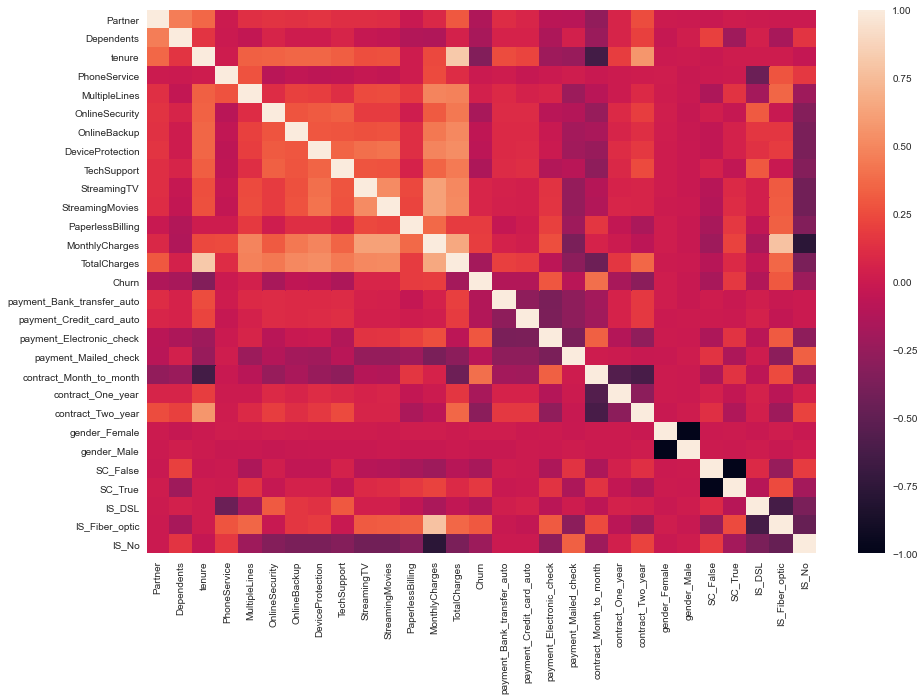

In [18]:
#Correlation heat map
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

In [19]:
#Assigning target and input data
target_data = df1[['Churn']]
target_data.dtypes

Churn    int64
dtype: object

In [20]:
input_data = df1.drop(['Churn'], axis=1)
input_data.dtypes

Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True                         uint8
IS_DSL                          uint8
IS_Fiber_opt

In [21]:
col_values = list(input_data.columns.values)

In [22]:
sns.set(color_codes=True)
plt.style.use('seaborn')

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

from sklearn.metrics import classification_report

In [23]:
input_data.fillna(0, inplace = True)

In [24]:
target_data.isnull().sum()

Churn    0
dtype: int64

# Model Building

In [25]:
X= df1.drop(['Churn'], axis=1)
y = df1[['Churn']]

In [26]:
X.fillna(0, inplace = True)
X = np.nan_to_num(X)
y = np.nan_to_num(y)

First i will try without Feature Selection

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

In [32]:
# Feature Scaling/Normalize=rupees, dollars=Same
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Importing the Keras libraries and packages
import keras # Main library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU # Activation fn
from keras.layers import Dropout 

Using TensorFlow backend.
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Md Khalid Siddique\Anaconda3\lib

In [34]:
# Initialising the ANN
classifier = Sequential()

In [35]:
X_train.shape

(2800, 28)

In [76]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation=act,input_dim = 28))

In [77]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation=act))

In [78]:
act = keras.layers.advanced_activations.PReLU(init='uniform', weights=None)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [79]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation=act))

In [80]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [81]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [82]:

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 200)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1875 samples, validate on 925 samples
Epoch 1/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6572 - accuracy: 0.7493 - val_loss: 0.6126 - val_accuracy: 0.7395
Epoch 2/200
1875/1875 [==============================] - 1s 499us/step - loss: 0.5738 - accuracy: 0.7493 - val_loss: 0.5745 - val_accuracy: 0.7395
Epoch 3/200
1875/1875 [==============================] - 1s 478us/step - loss: 0.5636 - accuracy: 0.7493 - val_loss: 0.5764 - val_accuracy: 0.7395
Epoch 4/200
1875/1875 [==============================] - 1s 499us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0.5741 - val_accuracy: 0.7395
Epoch 5/200
1875/1875 [==============================] - 1s 504us/step - loss: 0.5633 - accuracy: 0.7493 - val_loss: 0.5742 - val_accuracy: 0.7395
Epoch 6/200
1875/1875 [==============================] - 1s 497us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0.5737 - val_accuracy: 0.7395
Epoch 7/200
1875/1875 [==============================] - 1s 504us/step - 

Epoch 56/200
1875/1875 [==============================] - 1s 503us/step - loss: 0.5634 - accuracy: 0.7493 - val_loss: 0.5739 - val_accuracy: 0.7395
Epoch 57/200
1875/1875 [==============================] - 1s 497us/step - loss: 0.5634 - accuracy: 0.7493 - val_loss: 0.5739 - val_accuracy: 0.7395
Epoch 58/200
1875/1875 [==============================] - 1s 496us/step - loss: 0.5641 - accuracy: 0.7493 - val_loss: 0.5738 - val_accuracy: 0.7395
Epoch 59/200
1875/1875 [==============================] - 1s 501us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0.5746 - val_accuracy: 0.7395
Epoch 60/200
1875/1875 [==============================] - 1s 496us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0.5741 - val_accuracy: 0.7395
Epoch 61/200
1875/1875 [==============================] - 1s 501us/step - loss: 0.5639 - accuracy: 0.7493 - val_loss: 0.5742 - val_accuracy: 0.7395
Epoch 62/200
1875/1875 [==============================] - 1s 497us/step - loss: 0.5636 - accuracy: 0.7493 - val_

1875/1875 [==============================] - 1s 594us/step - loss: 0.5642 - accuracy: 0.7493 - val_loss: 0.5740 - val_accuracy: 0.7395
Epoch 112/200
1875/1875 [==============================] - 1s 542us/step - loss: 0.5635 - accuracy: 0.7493 - val_loss: 0.5737 - val_accuracy: 0.7395
Epoch 113/200
1875/1875 [==============================] - 1s 501us/step - loss: 0.5641 - accuracy: 0.7493 - val_loss: 0.5739 - val_accuracy: 0.7395
Epoch 114/200
1875/1875 [==============================] - 1s 602us/step - loss: 0.5634 - accuracy: 0.7493 - val_loss: 0.5737 - val_accuracy: 0.7395
Epoch 115/200
1875/1875 [==============================] - 1s 553us/step - loss: 0.5635 - accuracy: 0.7493 - val_loss: 0.5744 - val_accuracy: 0.7395
Epoch 116/200
1875/1875 [==============================] - 1s 528us/step - loss: 0.5640 - accuracy: 0.7493 - val_loss: 0.5742 - val_accuracy: 0.7395
Epoch 117/200
1875/1875 [==============================] - 1s 503us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0

1875/1875 [==============================] - 1s 572us/step - loss: 0.5635 - accuracy: 0.7493 - val_loss: 0.5737 - val_accuracy: 0.7395
Epoch 167/200
1875/1875 [==============================] - 1s 516us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0.5741 - val_accuracy: 0.7395
Epoch 168/200
1875/1875 [==============================] - 1s 494us/step - loss: 0.5637 - accuracy: 0.7493 - val_loss: 0.5737 - val_accuracy: 0.7395
Epoch 169/200
1875/1875 [==============================] - 1s 486us/step - loss: 0.5636 - accuracy: 0.7493 - val_loss: 0.5742 - val_accuracy: 0.7395
Epoch 170/200
1875/1875 [==============================] - 1s 477us/step - loss: 0.5636 - accuracy: 0.7493 - val_loss: 0.5736 - val_accuracy: 0.7395
Epoch 171/200
1875/1875 [==============================] - 1s 511us/step - loss: 0.5639 - accuracy: 0.7493 - val_loss: 0.5738 - val_accuracy: 0.7395
Epoch 172/200
1875/1875 [==============================] - 1s 533us/step - loss: 0.5633 - accuracy: 0.7493 - val_loss: 0

In [70]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


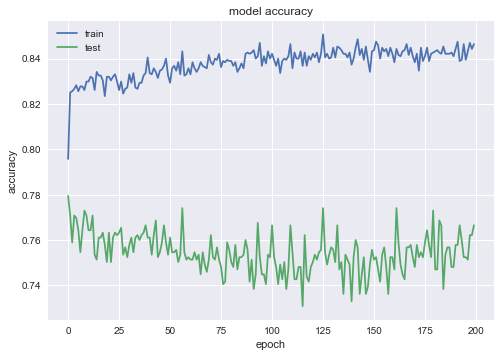

In [71]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()